# Open apps plots
We'll study the behavior of open apps to understand how to recognize open projects.

### Imports

In [1]:
import os
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil.parser import parse as date_parse
sns.set_theme()
pd.set_option("display.max_row", 100)
pd.set_option('display.max_columns', None)

### Import data

In [2]:
log_files = os.listdir("../logs")
logs_df = pd.DataFrame()
for file in log_files:
  currLogs = pd.read_csv("../logs/" + file)
  logs_df = pd.concat([logs_df, currLogs])

logs_df = logs_df.drop_duplicates(ignore_index=True)

Remove the rows without an end time:

In [3]:
logs_df = logs_df[pd.notnull(logs_df["EndTime"])]

In [4]:
logs_df

,Id,App,Name,Description,MainWindowTitle,StartTime,EndTime,Path
8,14016,File Explorer,explorer,Windows Explorer,NaN,2020-09-19T09:48:16,2020-09-19T10:27:02.646532,C:\\WINDOWS\\Explorer.EXE
9,19820,Firefox,firefox,Firefox,run python from shell at DuckDuckGo - Mozilla ...,2020-09-19T09:49:00,2020-09-19T10:01:37.223825,C:\\Program Files\\Mozilla Firefox\\firefox.exe
15,26420,NaN,AA_v3,Ammyy Admin,Ammyy Admin v3.9 - Free,2020-09-20T22:21:35,2020-09-20T22:22:22.224714,D:\\Downloads\\Telegram Desktop\\AA_v3.exe
16,26420,NaN,AA_v3,Ammyy Admin,192.168.1.105,2020-09-20T22:21:35,2020-09-20T22:22:54.522797,D:\\Downloads\\Telegram Desktop\\AA_v3.exe
17,26420,NaN,AA_v3,Ammyy Admin,47200832,2020-09-20T22:21:35,2020-09-20T22:23:59.095237,D:\\Downloads\\Telegram Desktop\\AA_v3.exe
...,...,...,...,...,...,...,...,...
3343,25168,Firefox,firefox,Firefox,????: 046326 - ???? ?????? ??????? ????????? -...,2020-11-22T19:53:28,2020-11-22T20:50:32.132859,C:\\Program Files\\Mozilla Firefox\\firefox.exe
3344,25168,Firefox,firefox,Firefox,Lecture and recitation 46326 - Mozilla Firefox,2020-11-22T19:53:28,2020-11-22T21:55:20.183105,C:\\Program Files\\Mozilla Firefox\\firefox.exe
3345,1132,MATLAB R2020b,MATLAB,MATLAB R2020b,MATLAB R2020b - academic use,2020-11-22T20:34:28,2020-11-22T20:44:15.953287,C:\\Program Files\\MATLAB\\R2020b\\bin\\win64\...
3348,10100,Windows Fax and Scan,cmd,Windows Command Processor,Command Prompt,2020-11-22T19:13:12,2020-11-22T19:53:31.402124,C:\\WINDOWS\\system32\\cmd.exe


### Dates and time
Parse the dates in StartTime and EndTime - we'll use the numbers since its better, but we'll subtract 2020-08

In [5]:
earliest = date_parse(logs_df.StartTime.sort_values().iloc[0]).timestamp()
def parse_date_or_nan(date_str):
    try:
        return date_parse(date_str).timestamp() - earliest
    except:
        return None

In [6]:
# date_parse(logs_df.StartTime[0]).timestamp()
logs_df[["StartTime"]] = logs_df[["StartTime"]].applymap(lambda d: parse_date_or_nan(d))
logs_df[["EndTime"]] = logs_df[["EndTime"]].applymap(lambda d: parse_date_or_nan(d))

In addition, we'll add a column of end time minus start:

In [7]:
logs_df["End_minus_Start"] = logs_df.apply(lambda row: row.EndTime - row.StartTime, axis=1)

### Remove the data from September

In [8]:
logs_df = logs_df[logs_df["EndTime"] > 1E6]

## Create a groupby object

In [9]:
name_groups = logs_df.groupby(["Name", "Description"])
name_groups.Id.count()

Name                                                                                                 Description                                
AcroRd32                                                                                             Adobe Acrobat Reader DC                         174
ApplicationFrameHost                                                                                 Application Frame Host                           75
BatmanAK                                                                                             Batman: Arkham Knight                             7
Code                                                                                                 Visual Studio Code                               89
CptHost                                                                                              Zoom Sharing Host                                 1
EXCEL                                                                                     

In [10]:
time_groups = logs_df.groupby(["Name", "Id", "StartTime"])
print("number of different time groups:")
print(len(time_groups))
time_count = time_groups.EndTime.count()
time_max = time_groups[["EndTime", "End_minus_Start"]].max()
time_max.reset_index(inplace=True)
time_max

number of different time groups:
315


,Name,Id,StartTime,EndTime,End_minus_Start
0,AcroRd32,1976,4831070.0,4.834231e+06,3161.447203
1,AcroRd32,7380,4518582.0,4.831041e+06,312459.161881
2,AcroRd32,11036,3403653.0,3.407752e+06,4099.154929
3,AcroRd32,11700,3476936.0,3.496362e+06,19425.859568
4,AcroRd32,13208,4861138.0,5.034610e+06,173472.157200
...,...,...,...,...,...
310,thunderbird,17032,3182474.0,3.182658e+06,183.524144
311,thunderbird,17932,4614957.0,4.834357e+06,219400.451285
312,thunderbird,20332,3034632.0,3.034746e+06,114.301566
313,thunderbird,27272,3401735.0,3.407752e+06,6017.154929


Finally, we want to have the start and end times on the same column, to show a line plot connecting start to end for each app.

In [11]:
end_df = time_max[["Id", "Name", "EndTime"]]
end_df = end_df.rename(columns={"EndTime": "Time"})
start_df = time_max[["Id", "Name", "StartTime"]]
start_df = start_df.rename(columns={"StartTime": "Time"})
line_df = pd.concat([start_df, end_df], axis=0)
display(line_df)

,Id,Name,Time
0,1976,AcroRd32,4.831070e+06
1,7380,AcroRd32,4.518582e+06
2,11036,AcroRd32,3.403653e+06
3,11700,AcroRd32,3.476936e+06
4,13208,AcroRd32,4.861138e+06
...,...,...,...
310,17032,thunderbird,3.182658e+06
311,17932,thunderbird,4.834357e+06
312,20332,thunderbird,3.034746e+06
313,27272,thunderbird,3.407752e+06


## Plots:
We want to show the data in various ways - to see how to correctly cluster the programs

In [12]:
SHOW_LEGEND = True

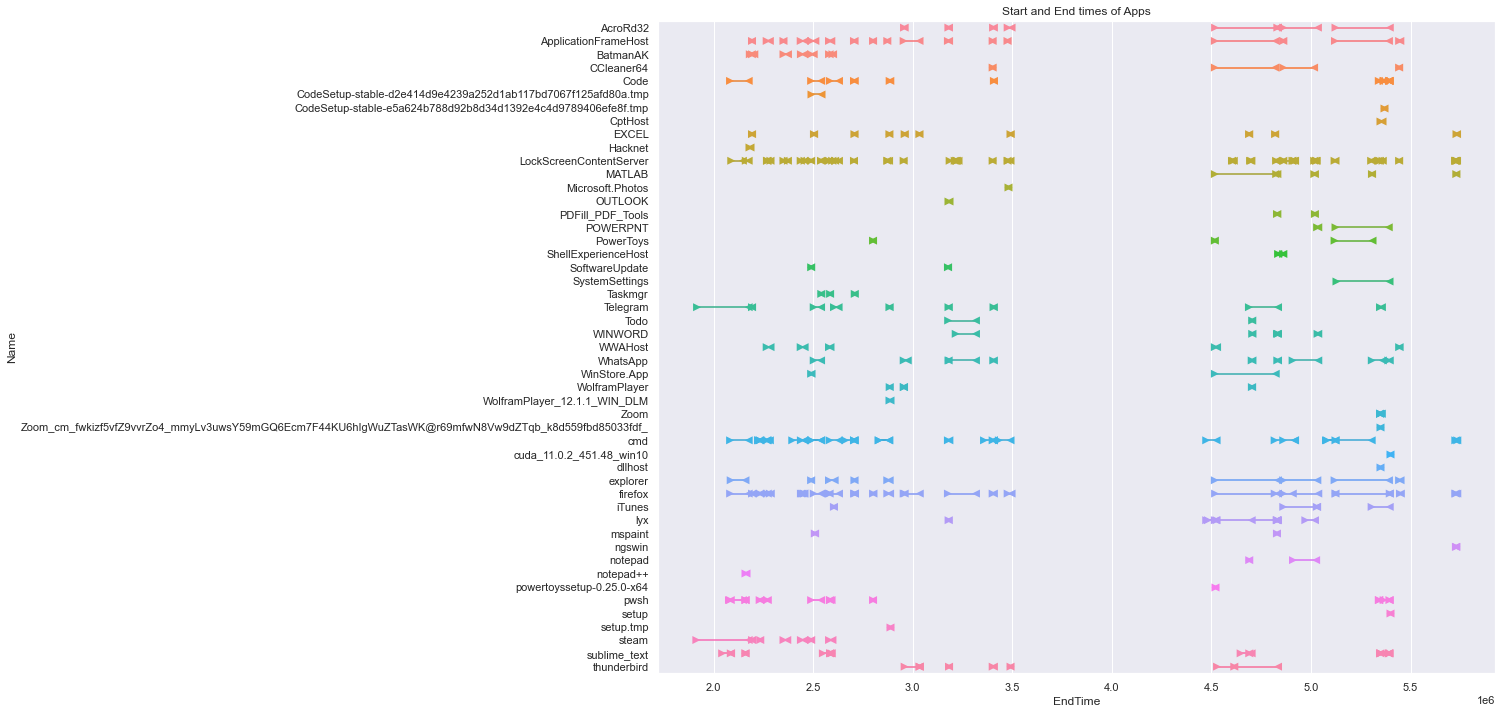

In [13]:
plt.figure(figsize=(15,12))
g = sns.lineplot(
    data=line_df,
    x="Time", y="Name", hue="Name", units="Id",
    estimator=None,
    legend=False
)

g = sns.stripplot(
    data=time_max,
    y="Name", x="StartTime",
    size=8,
    marker=">",
    jitter=False
)

g = sns.stripplot(
    data=time_max,
    y="Name", x="EndTime",
    size=8,
    marker="<",
    jitter=False
)
g.set_title("Start and End times of Apps")
plt.show()

We can see above when and what apps are run concurrently.

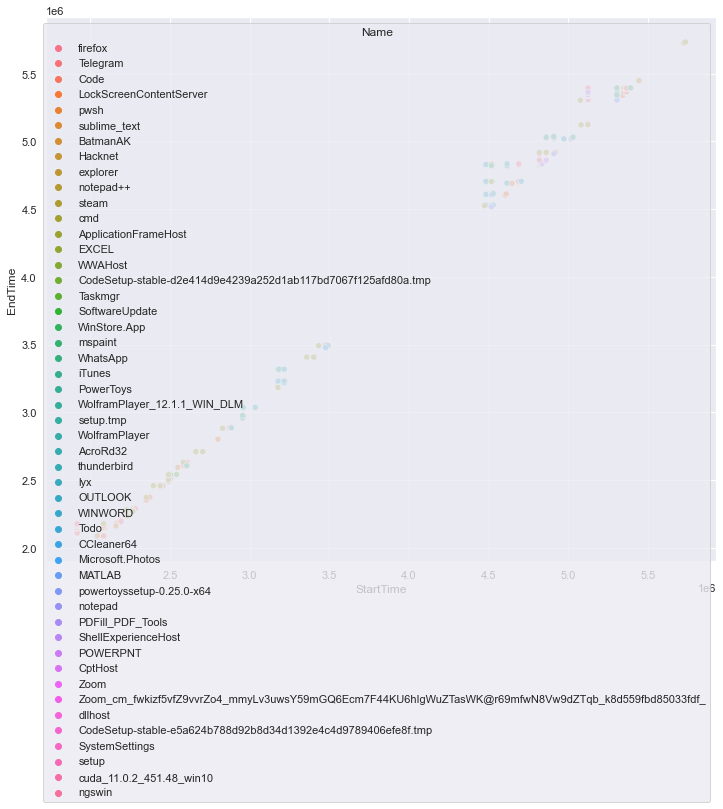

In [14]:
fig = plt.figure(figsize=(12,10))
g = sns.scatterplot(
    data=logs_df,
    y="EndTime", x="StartTime", hue="Name",
    legend=SHOW_LEGEND
)
# g.set_xticklabels(g.get_xticklabels(), rotation=90)

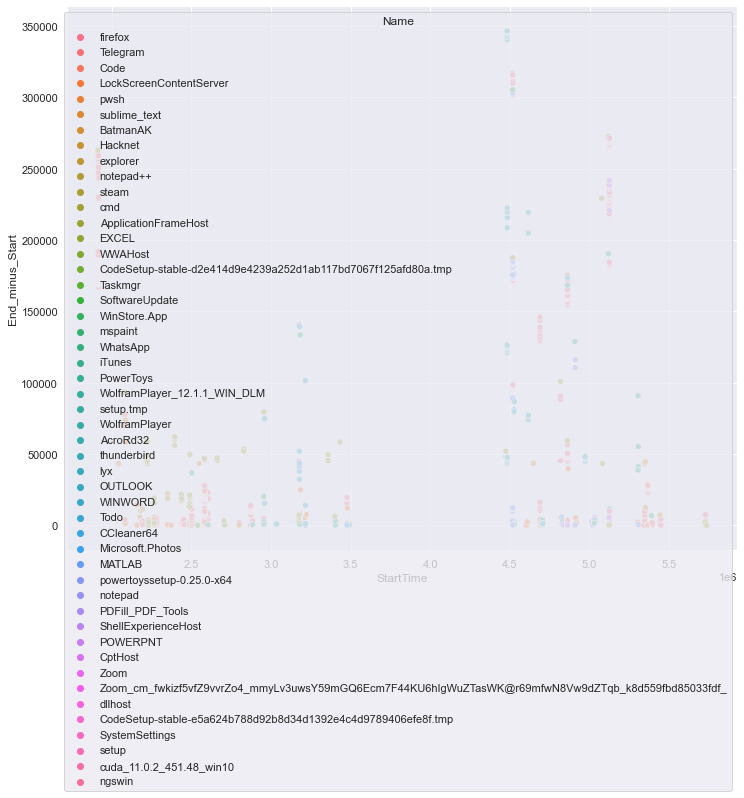

In [15]:
fig = plt.figure(figsize=(12,10))
g = sns.scatterplot(
    data=logs_df,
    x="StartTime", y="End_minus_Start", hue="Name",
    legend=SHOW_LEGEND
)

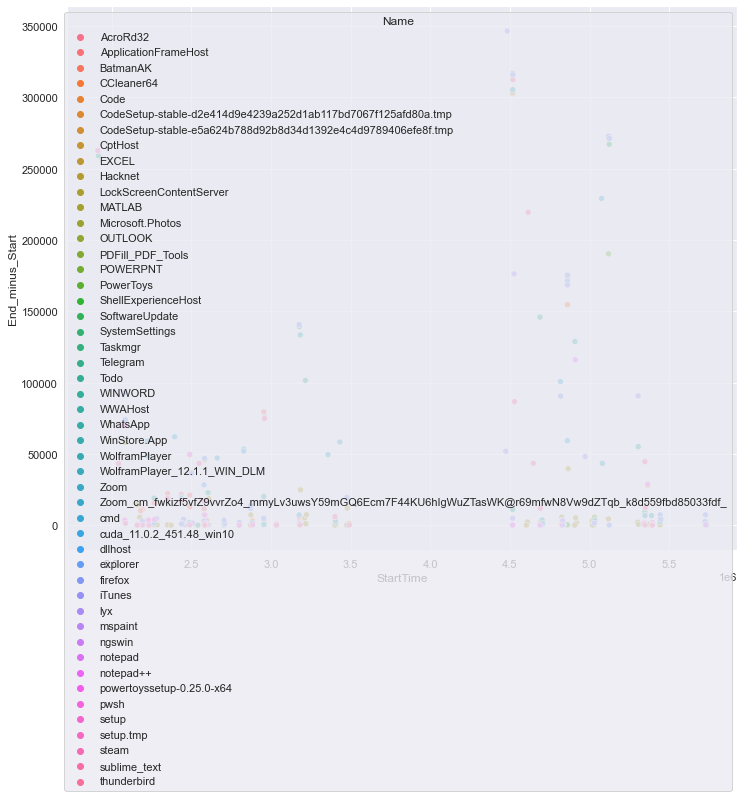

In [16]:
fig = plt.figure(figsize=(12,10))
g = sns.scatterplot(
    data=time_max,
    x="StartTime", y="End_minus_Start", hue="Name",
    legend=SHOW_LEGEND
)

### Description
Looking at this plot, we can imagine that for two apps to overlap, the start of one, must be between the start of the other.
This means If we take the start time, and the end time, the other's start time must be between them.

## Conclusion
We want to understand what apps run together, therefore, we will look for each app, which other app starts between its end and start times, and than calculate how much of a ratio there is between concurrent running times, and the running time of each app.
We will then add this value to the weight of the edge between the two app nodes in our graph.
#### One question:
What do we do with rows without end-times?
#### Answer:
The two options are either looking at the file, and assigning the last time the file was updated plus a bit, or simply ignoring them. We'll start by ignoring because it's easier.
#### Note:
We are currently looking only at the apps, and not at the files within them - this will be the next step.

In [17]:
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil.parser import parse as date_parse

class appsGraph:
  def __init__(self, last_update=None, apps = []):
    self.apps = apps # list of strings of apps
    self.graph_matrix = np.zeros([len(self.apps), len(self.apps)])
    self.last_update = date_parse(last_update).timestamp() if last_update \
      else date_parse("2020-10-01").timestamp()

  def update_apps(self, apps):
    new_apps = list(filter(lambda app: app not in self.apps, apps))
    self.graph_matrix = np.concatenate((self.graph_matrix,
      np.zeros([len(new_apps), len(self.apps)])), axis=0)
    self.apps += new_apps
    self.graph_matrix = np.concatenate((self.graph_matrix,
      np.zeros([len(self.apps), len(new_apps)])), axis=1)

  def parse_date(self, date_value):
    if type(date_value) == int or type(date_value) == float: return date_value
    else:
      try:
        return date_parse(date_value).timestamp()
      except:
        return None

  def get_max_time_of_apps(self, apps_df):
    time_groups = apps_df.groupby(["Name", "Id", "StartTime"])
    self.max_app_times = time_groups[["EndTime"]].max()
    self.max_app_times.reset_index(inplace=True)

  def update(self, apps_df):
    # The apps_df should hold rows with the app name, and the start and
    # end time:
    key_fields = ["Name", "Id", "StartTime", "EndTime"]
    if (any([field not in apps_df.columns for field in key_fields])):
      raise TypeError("graph update missing key column")
    # update apps list:
    apps = apps_df["Name"].unique()
    self.update_apps(apps)
    # change dates to numeric values:
    apps_df[["StartTime"]] = apps_df[["StartTime"]]\
      .applymap(lambda d: self.parse_date(d))
    apps_df[["EndTime"]] = apps_df[["EndTime"]]\
      .applymap(lambda d: self.parse_date(d))
    # get max times for each app instance (unique - id and start time)
    self.get_max_time_of_apps(apps_df)
    # get only the rows that end after the last update
    apps_to_update = self.max_app_times[self.max_app_times["EndTime"] > \
      self.last_update]
    earliest_start = apps_to_update["StartTime"].min()
    apps_to_check = self.max_app_times[self.max_app_times["EndTime"] > \
      earliest_start]
    print("Updating", len(apps_to_update), "apps")
    print("Checking against", len(apps_to_check), "apps")
    # update the graph matrix:
    self.update_graph(apps_to_update, apps_to_check)
    # update last update time:
    self.last_update = datetime.now().timestamp()

  def update_graph(self, apps_to_update, apps_to_check):
    for ind1, app1 in apps_to_update.iterrows():
      for ind2, app2 in apps_to_check.iterrows():
        x_ind = self.apps.index(app1["Name"])
        y_ind = self.apps.index(app2["Name"])
        concurrency = self.get_apps_concurrency(app1, app2)
        self.graph_matrix[x_ind, y_ind] += concurrency
        # If app2 is in apps_to_update and of course, app1 is in apps_to_check
        # We don't need to add to [y_ind, x_ind]:
        if app2["Name"] in apps_to_update["Name"]: continue
        self.graph_matrix[y_ind, x_ind] = self.graph_matrix[x_ind, y_ind]

  def get_apps_concurrency(self, app1, app2):
    # the concurrency is equal to the end time of one app, minus the start time
    # of the other and of course the minimum on both options.
    # a:  |-------|
    # b:      |------------|
    # as we can see, the value is indeed: min(end_a - start_b, end_b - start_a)
    # If there is now concurrency, the minimum value will be negative, so we
    # will max this with 0.
    # a:  |-------|
    # b:              |------------|
    diff1 = app1["EndTime"] - app2["StartTime"]
    diff2 = app2["EndTime"] - app1["StartTime"]
    diff3 = app1["EndTime"] - app1["StartTime"]
    diff4 = app2["EndTime"] - app2["StartTime"]
    concurrency = max(0, min(diff1, diff2, diff3, diff4))
    return concurrency

  def get_graph(self):
    # We need to normalize the matrix. We will do so by dividing each ROW by the
    # time the app of the row was open - this is exactly the diagonal of the
    # matrix.
    diag = self.graph_matrix.diagonal()
    diag = np.where(diag == 0, 1, diag)
    current_graph = self.graph_matrix / diag[:, None]
    self.graph_df = pd.DataFrame(current_graph, columns=self.apps, index=self.apps)
    return current_graph

In [18]:
apps = pd.DataFrame()
for file in log_files:
  currLogs = pd.read_csv("../logs/" + file)
  apps = pd.concat([apps, currLogs])

apps = apps.drop_duplicates(ignore_index=True)
apps = apps[pd.notnull(apps["EndTime"])]

apps_graph = appsGraph()
apps_graph.update(apps)

Updating 315 apps
Checking against 315 apps


<AxesSubplot:>

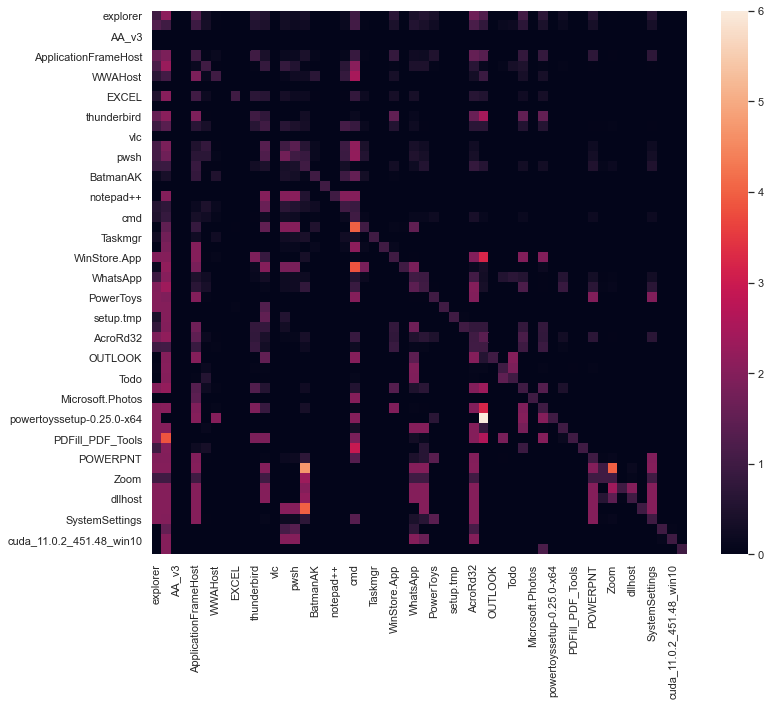

In [19]:
graph_mat = apps_graph.get_graph()

fig = plt.figure(figsize=(12,10))
sns.heatmap(
    data = apps_graph.graph_df
)

In [20]:
print(np.mean(graph_mat))

0.22211024569803556
